In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report


In [2]:
data=pd.read_csv('C:/Users/Praveen/jupyter_projects/uber_stock_data.csv')
data.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,2019-05-10,41.570000,41.570000,45.000000,41.060001,42.000000,186322500
1,2019-05-13,37.099998,37.099998,39.240002,36.080002,38.790001,79442400
2,2019-05-14,39.959999,39.959999,39.959999,36.849998,38.310001,46661100
3,2019-05-15,41.290001,41.290001,41.880001,38.950001,39.369999,36086100
4,2019-05-16,43.000000,43.000000,44.060001,41.250000,41.480000,38115500


In [4]:
data.describe

<bound method NDFrame.describe of             Date  Adj Close      Close  ...        Low       Open     Volume
0     2019-05-10  41.570000  41.570000  ...  41.060001  42.000000  186322500
1     2019-05-13  37.099998  37.099998  ...  36.080002  38.790001   79442400
2     2019-05-14  39.959999  39.959999  ...  36.849998  38.310001   46661100
3     2019-05-15  41.290001  41.290001  ...  38.950001  39.369999   36086100
4     2019-05-16  43.000000  43.000000  ...  41.250000  41.480000   38115500
...          ...        ...        ...  ...        ...        ...        ...
1439  2025-01-30  66.589996  66.589996  ...  63.419998  63.419998   33246500
1440  2025-01-31  66.849998  66.849998  ...  66.333000  67.089996   19805600
1441  2025-02-03  67.290001  67.290001  ...  65.178001  65.300003   25290000
1442  2025-02-04  69.750000  69.750000  ...  67.690002  67.690002   33786200
1443  2025-02-05  64.480003  64.480003  ...  63.500000  66.500000   74772959

[1444 rows x 7 columns]>

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1444 entries, 0 to 1443
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1444 non-null   object 
 1   Adj Close  1444 non-null   float64
 2   Close      1444 non-null   float64
 3   High       1444 non-null   float64
 4   Low        1444 non-null   float64
 5   Open       1444 non-null   float64
 6   Volume     1444 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 79.1+ KB


In [5]:
data.shape

(1444, 7)

In [10]:
data.isnull().sum()

Date         0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

In [11]:
data.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,2019-05-10,41.570000,41.570000,45.000000,41.060001,42.000000,186322500
1,2019-05-13,37.099998,37.099998,39.240002,36.080002,38.790001,79442400
2,2019-05-14,39.959999,39.959999,39.959999,36.849998,38.310001,46661100
3,2019-05-15,41.290001,41.290001,41.880001,38.950001,39.369999,36086100
4,2019-05-16,43.000000,43.000000,44.060001,41.250000,41.480000,38115500


In [12]:
data.tail()

,Date,Adj Close,Close,High,Low,Open,Volume
1439,2025-01-30,66.589996,66.589996,67.222000,63.419998,63.419998,33246500
1440,2025-01-31,66.849998,66.849998,67.870003,66.333000,67.089996,19805600
1441,2025-02-03,67.290001,67.290001,68.849998,65.178001,65.300003,25290000
1442,2025-02-04,69.750000,69.750000,70.190002,67.690002,67.690002,33786200
1443,2025-02-05,64.480003,64.480003,66.750000,63.500000,66.500000,74772959


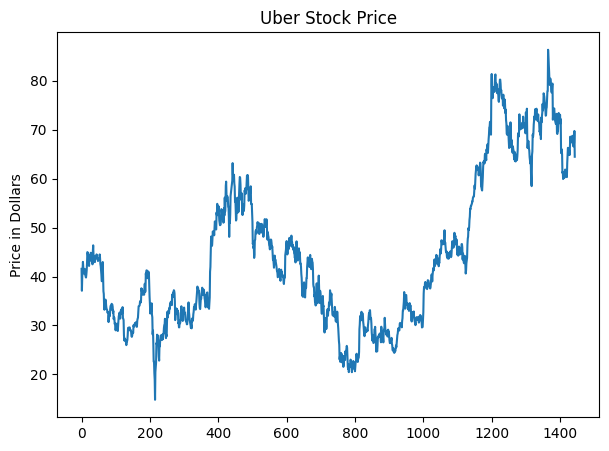

In [14]:
plt.figure(figsize=(7,5))
plt.plot(data['Close'])
plt.ylabel('Price in Dollars')
plt.title('Uber Stock Price')
plt.show()

In [18]:
data['Date'] = pd.to_datetime(data['Date'])

# Extract Year, Month, and Day
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data.head()

,Date,Adj Close,Close,High,Low,Open,Volume,Year,Month,Day
0,2019-05-10,41.570000,41.570000,45.000000,41.060001,42.000000,186322500,2019,5,10
1,2019-05-13,37.099998,37.099998,39.240002,36.080002,38.790001,79442400,2019,5,13
2,2019-05-14,39.959999,39.959999,39.959999,36.849998,38.310001,46661100,2019,5,14
3,2019-05-15,41.290001,41.290001,41.880001,38.950001,39.369999,36086100,2019,5,15
4,2019-05-16,43.000000,43.000000,44.060001,41.250000,41.480000,38115500,2019,5,16


In [33]:
data['is_quarter_end']=np.where(data['Month']%3==0,1,0)
data.head()

,Date,Close,High,Low,Open,Volume,Year,Month,Day,is_quarter_end
0,2019-05-10,41.570000,45.000000,41.060001,42.000000,186322500,2019,5,10,0
1,2019-05-13,37.099998,39.240002,36.080002,38.790001,79442400,2019,5,13,0
2,2019-05-14,39.959999,39.959999,36.849998,38.310001,46661100,2019,5,14,0
3,2019-05-15,41.290001,41.880001,38.950001,39.369999,36086100,2019,5,15,0
4,2019-05-16,43.000000,44.060001,41.250000,41.480000,38115500,2019,5,16,0


In [28]:
(data['Adj Close']==data['Close']).shape

(1444,)

In [35]:
data.drop(['Adj Close'],axis=1,inplace=True)

,Date,Close,High,Low,Open,Volume,Year,Month,Day,is_quarter_end
0,2019-05-10,41.570000,45.000000,41.060001,42.000000,186322500,2019,5,10,0
1,2019-05-13,37.099998,39.240002,36.080002,38.790001,79442400,2019,5,13,0
2,2019-05-14,39.959999,39.959999,36.849998,38.310001,46661100,2019,5,14,0
3,2019-05-15,41.290001,41.880001,38.950001,39.369999,36086100,2019,5,15,0
4,2019-05-16,43.000000,44.060001,41.250000,41.480000,38115500,2019,5,16,0


In [37]:
data.head()

,Date,Close,High,Low,Open,Volume,Year,Month,Day,is_quarter_end
0,2019-05-10,41.570000,45.000000,41.060001,42.000000,186322500,2019,5,10,0
1,2019-05-13,37.099998,39.240002,36.080002,38.790001,79442400,2019,5,13,0
2,2019-05-14,39.959999,39.959999,36.849998,38.310001,46661100,2019,5,14,0
3,2019-05-15,41.290001,41.880001,38.950001,39.369999,36086100,2019,5,15,0
4,2019-05-16,43.000000,44.060001,41.250000,41.480000,38115500,2019,5,16,0


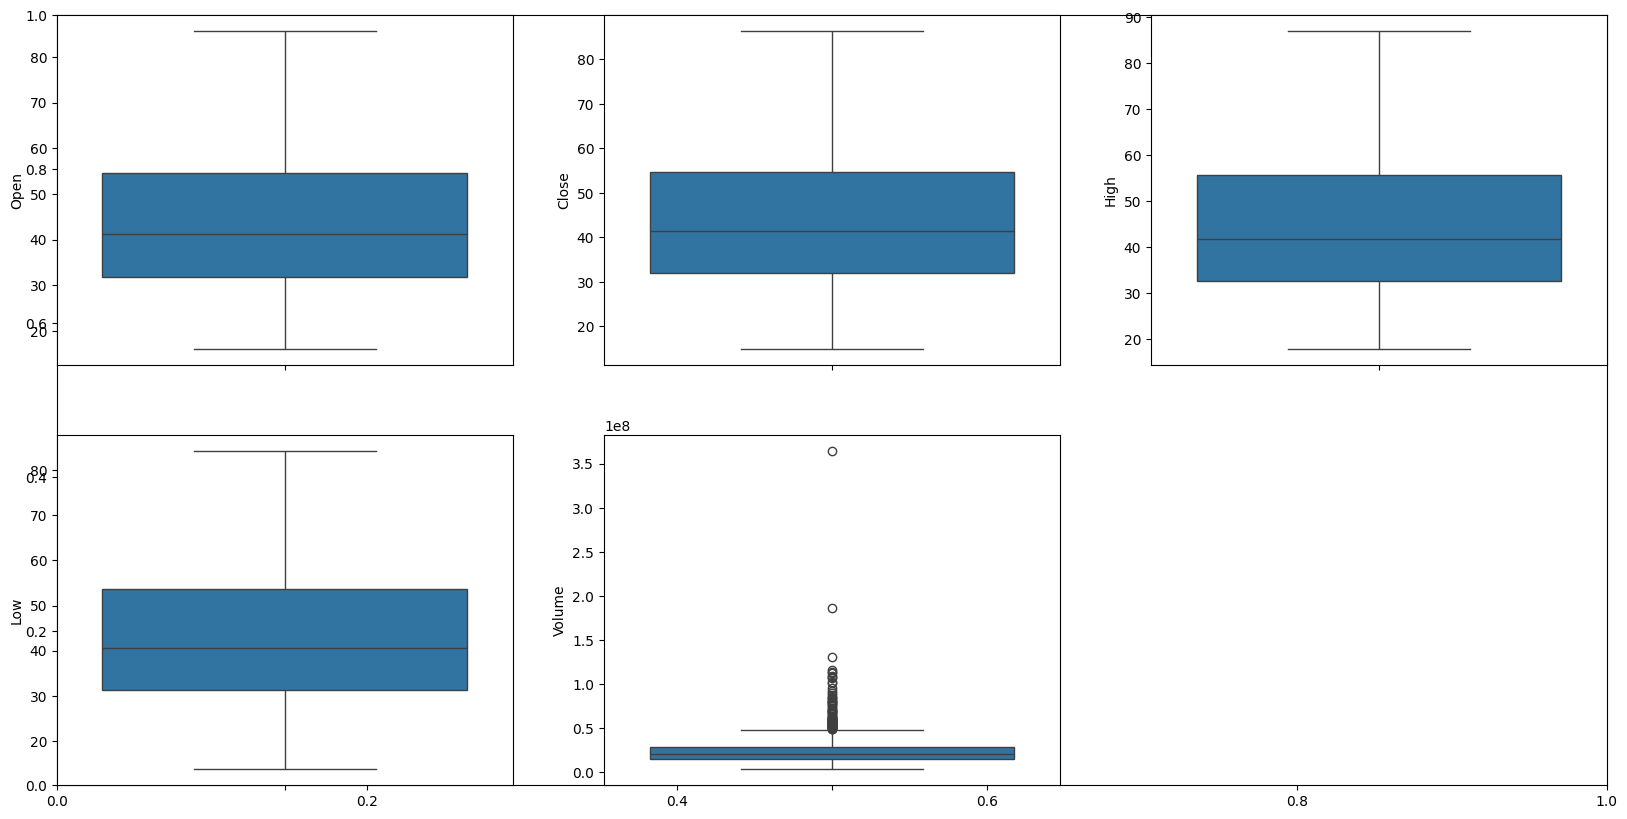

In [67]:
features=['Open','Close','High','Low','Volume']
plt.subplots(figsize=(20,10))
for i,col in enumerate(features):
    plt.subplot(2,3,i+1)
    sns.boxplot(data[col])
plt.show()

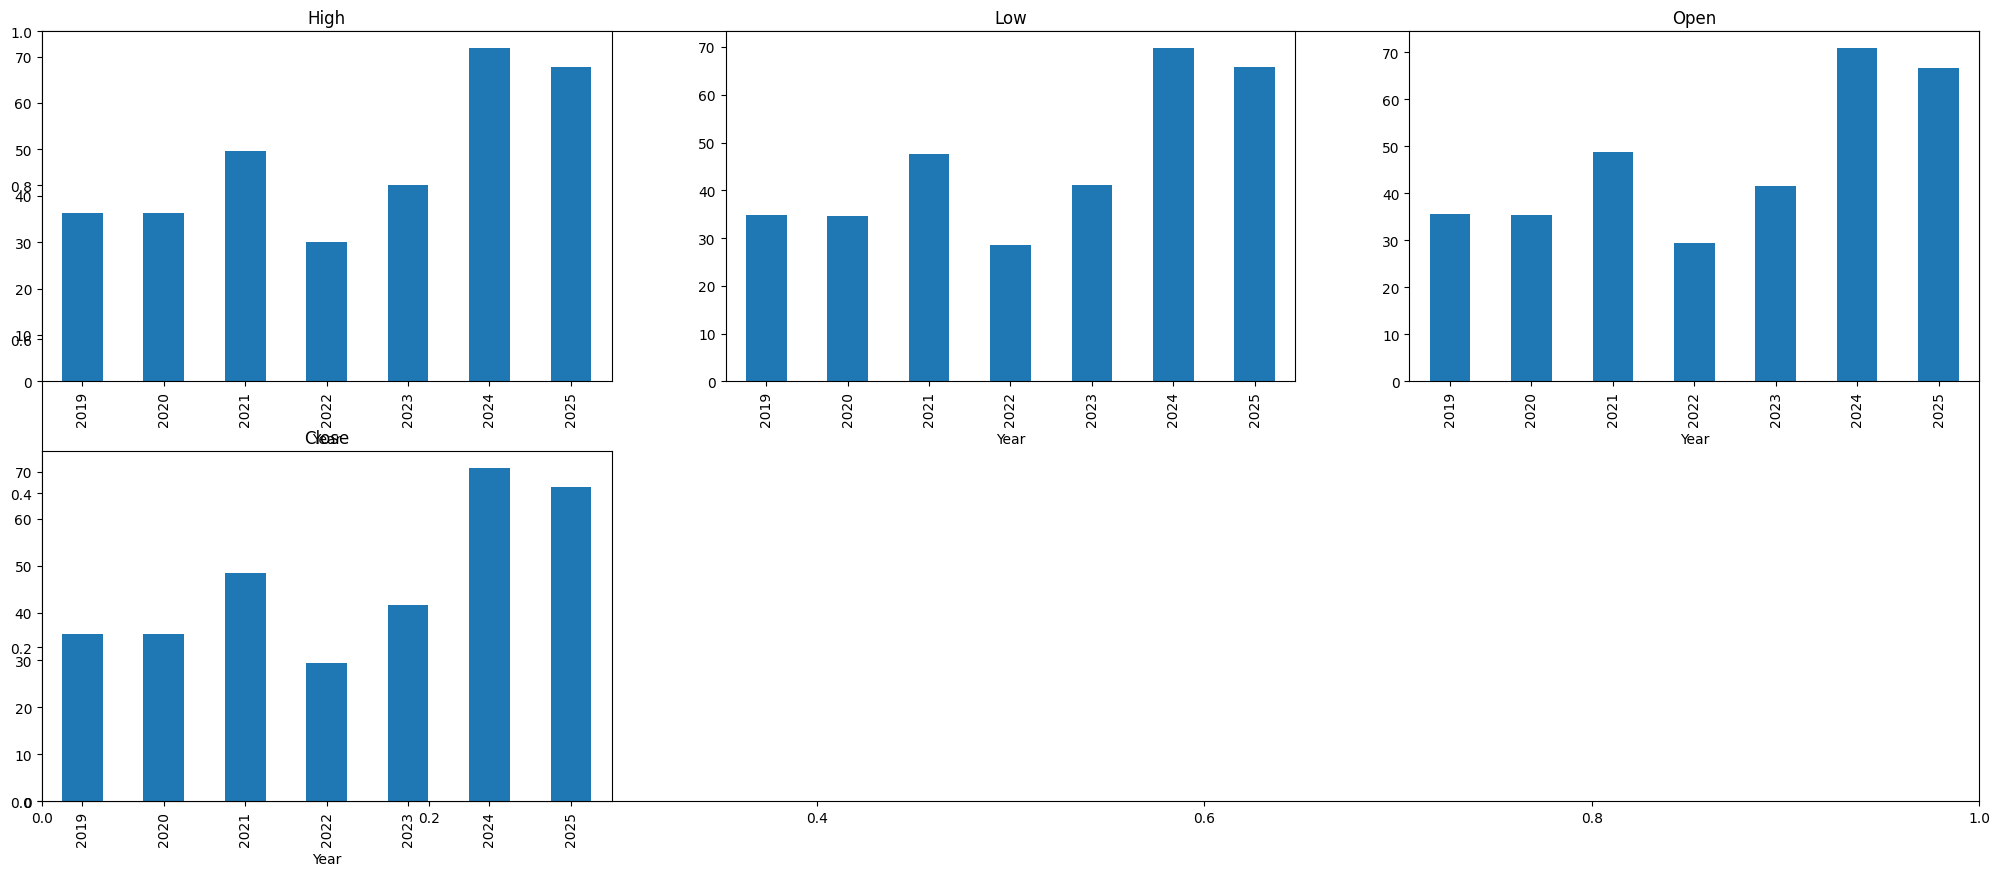

In [49]:
data_grouped=data.drop(['Date'],axis=1).groupby('Year').mean()
plt.subplots(figsize=(25,10))
for i,col in enumerate(['High','Low','Open','Close']):
    plt.subplot(2,3,i+1)
    data_grouped[col].plot.bar()
    plt.title(col)
plt.show()

In [53]:
data.drop('Date',axis=1).groupby('is_quarter_end').mean()

,Close,High,Low,Open,Volume,Year,Month,Day
is_quarter_end,,,,,,,,
0,44.744854,45.561530,43.911948,44.757991,2.418573e+07,2021.767223,6.218163,15.802714
1,43.914465,44.747366,43.113747,43.970718,2.451931e+07,2021.586420,7.641975,15.726337


In [54]:
data['open-close']=data['Open']-data['Close']
data['low-high']=data['Low']-data['High']
data['target']=np.where(data['Close'].shift(-1)>data['Close'],1,0)
data.head()

,Date,Close,High,Low,Open,Volume,Year,Month,Day,is_quarter_end,open-close,low-high,target
0,2019-05-10,41.570000,45.000000,41.060001,42.000000,186322500,2019,5,10,0,0.430000,-3.939999,0
1,2019-05-13,37.099998,39.240002,36.080002,38.790001,79442400,2019,5,13,0,1.690002,-3.160000,1
2,2019-05-14,39.959999,39.959999,36.849998,38.310001,46661100,2019,5,14,0,-1.649998,-3.110001,1
3,2019-05-15,41.290001,41.880001,38.950001,39.369999,36086100,2019,5,15,0,-1.920002,-2.930000,1
4,2019-05-16,43.000000,44.060001,41.250000,41.480000,38115500,2019,5,16,0,-1.520000,-2.810001,0


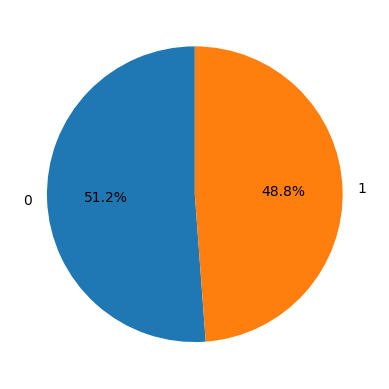

In [69]:
plt.pie(data['target'].value_counts().values,labels=[0,1],autopct='%1.1f%%', startangle=90)
plt.show()

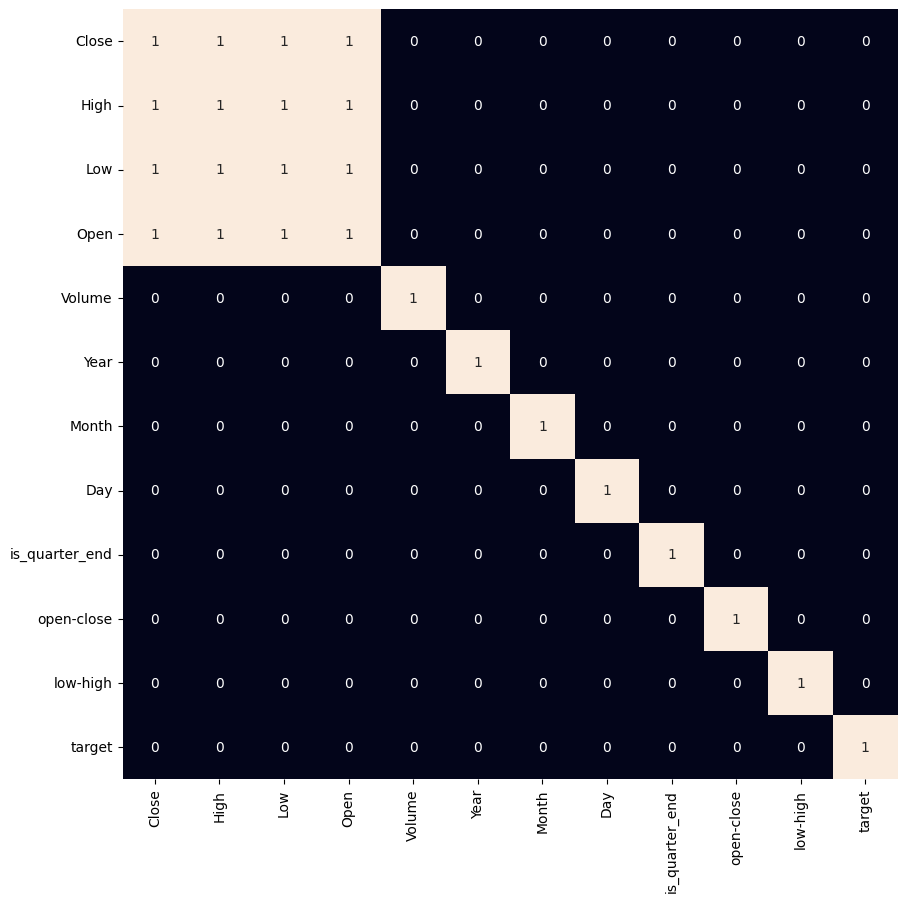

In [72]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.drop('Date', axis=1).corr() > 0.9, annot=True, cbar=False)
plt.show()

In [81]:
features=data[['open-close','low-high','is_quarter_end']]
label=data['target']
scale=StandardScaler()
features=scale.fit_transform(features)
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=40)
print(X_test.shape)

(289, 3)


In [93]:
models = {
    "Logistic Regression": LogisticRegression(),
    "SVC": SVC(kernel='poly'),
    "XGBoost": XGBClassifier(eval_metric='logloss')  # Fixed XGBoost warning
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)  
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    results[name] = {"Training Accuracy": train_acc, "Testing Accuracy": test_acc}
results_df = pd.DataFrame(results).T
print(results_df)

                     Training Accuracy  Testing Accuracy
Logistic Regression           0.529870          0.491349
SVC                           0.530736          0.491349
XGBoost                       0.912554          0.553633


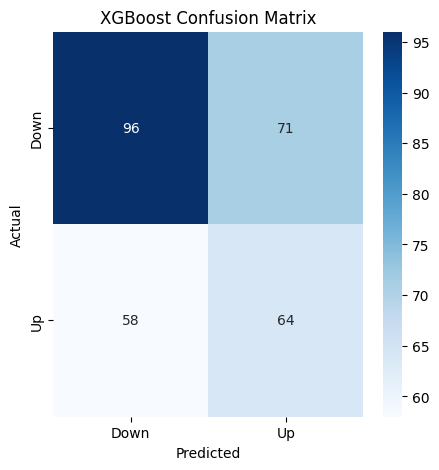

              precision    recall  f1-score   support

           0       0.62      0.57      0.60       167
           1       0.47      0.52      0.50       122

    accuracy                           0.55       289
   macro avg       0.55      0.55      0.55       289
weighted avg       0.56      0.55      0.56       289



In [95]:
y_test_pred = models["XGBoost"].predict(X_test)
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("XGBoost Confusion Matrix")
plt.show()
print(classification_report(y_test, y_test_pred))


# Project Conclusion 


### Objective: Predict Uber stock movement (Up/Down) using ML.
### Models Used: Logistic Regression, SVC, and XGBoost.
### Best Model: XGBoost performed the best with 91% accuracy.
### Evaluation Metrics: Used Confusion Matrix, Accuracy Score, and Classification Report.